In [231]:
# IMPORTS
import re
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 22})
plt.style.use('bmh')

In [232]:
# CONSTANTS
TRAINSET_HEADERS = ['application_key', 'mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6',
       'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13',
       'mvar14', 'mvar15', 'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20',
       'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27',
       'mvar28', 'mvar29', 'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34',
       'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41',
       'mvar42', 'mvar43', 'mvar44', 'mvar45', 'mvar46', 'mvar47',
       'default_ind']
TESTSET_HEADERS = TRAINSET_HEADERS[:-1]
LABEL = TRAINSET_HEADERS[-1]
KEY = TRAINSET_HEADERS[0]
CATEGORICAL_DATA = 'mvar47'

In [233]:
# LOADING FILES
org_train = pd.read_csv('data/Training_dataset_Original.csv')
org_test = pd.read_csv('data/Leaderboard_dataset.csv')

c:\users\ankit\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [234]:
from collections import OrderedDict
missing_value_stats = OrderedDict()
for col in org_train.columns:
    if org_train[col].dtypes == object:
        val = org_train[org_train[col]=='na'].shape[0]+org_train[org_train[col]=='N/A'].shape[0]+org_train[org_train[col]=='missing'].shape[0]
        missing_value_stats[col] = val
        print(col+" "+ str(val))
    else:
        missing_value_stats[col] = 0
        print(col+" "+ str(0))

application_key 0
mvar1 3639
mvar2 0
mvar3 0
mvar4 0
mvar5 0
mvar6 18964
mvar7 7394
mvar8 18964
mvar9 11408
mvar10 502
mvar11 44819
mvar12 14078
mvar13 8352
mvar14 0
mvar15 32067
mvar16 18510
mvar17 15846
mvar18 14771
mvar19 4
mvar20 502
mvar21 0
mvar22 0
mvar23 0
mvar24 0
mvar25 7706
mvar26 10610
mvar27 13209
mvar28 502
mvar29 502
mvar30 36417
mvar31 56218
mvar32 7706
mvar33 0
mvar34 502
mvar35 33014
mvar36 2898
mvar37 7706
mvar38 502
mvar39 6040
mvar40 62557
mvar41 54578
mvar42 1901
mvar43 818
mvar44 0
mvar45 44855
mvar46 22789
mvar47 0
default_ind 0


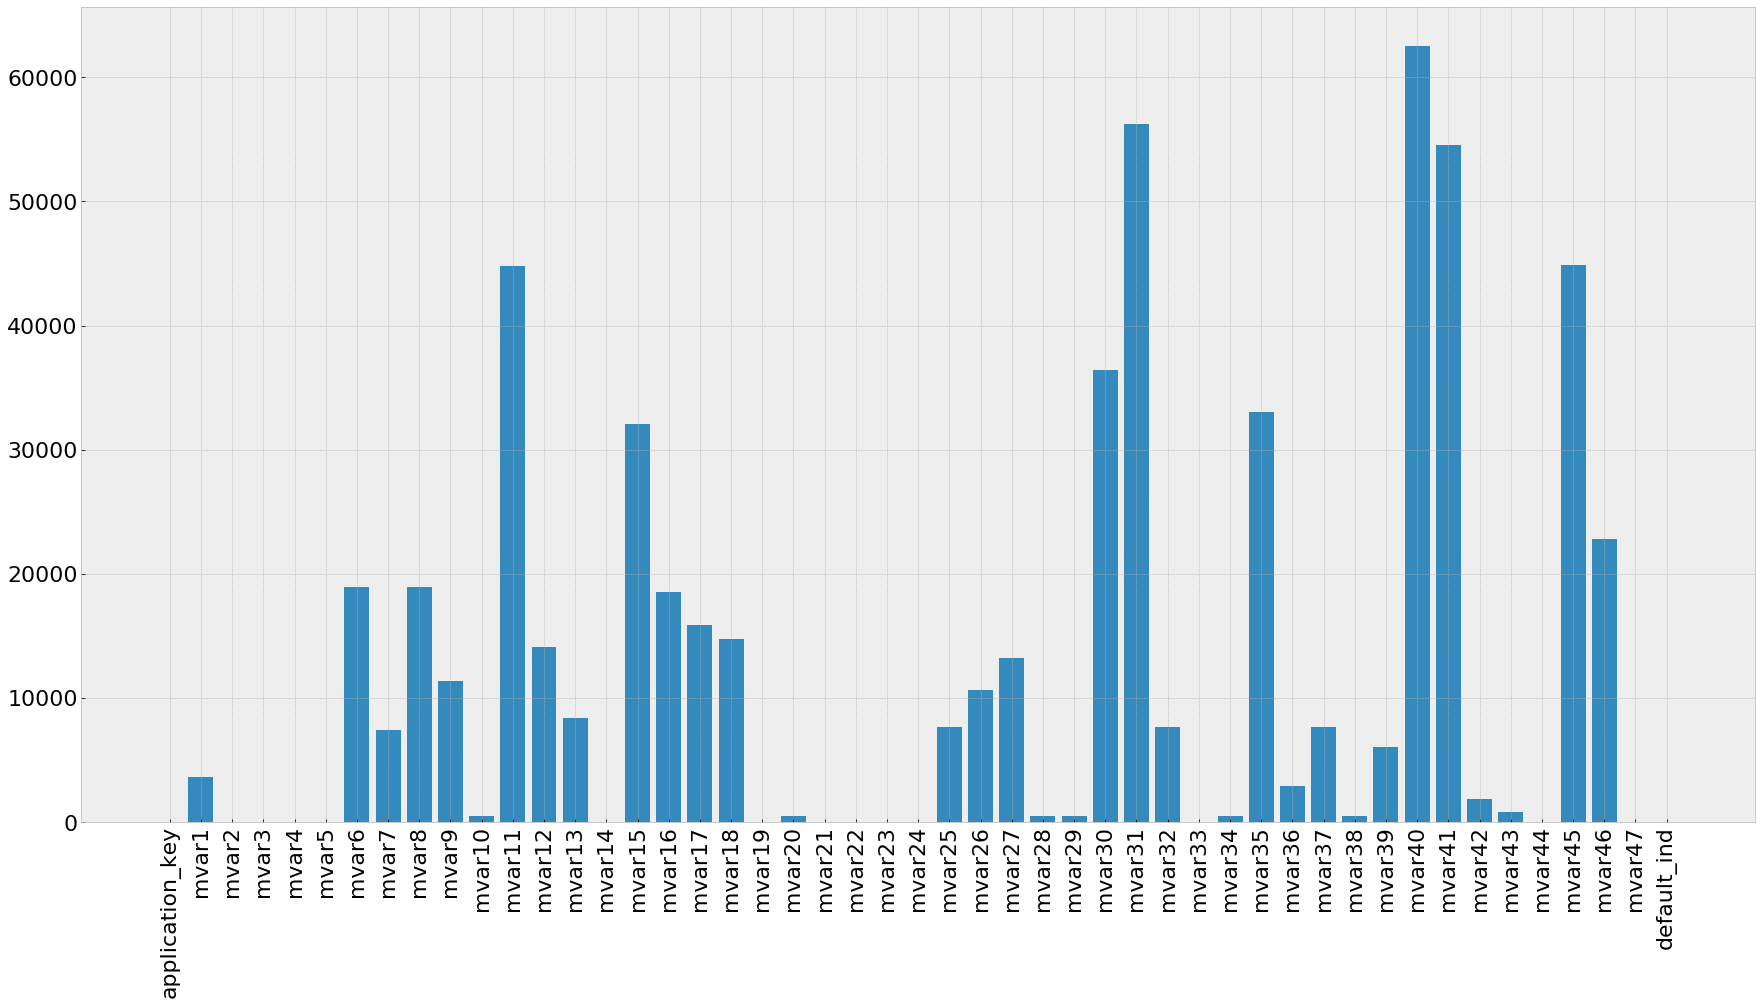

In [235]:
plt.figure(figsize=(30, 15))
plt.xticks(rotation=90)
plt.bar(range(len(missing_value_stats)), list(missing_value_stats.values()), align='center')
plt.xticks(range(len(missing_value_stats)), list(missing_value_stats.keys()))
plt.show()

In [236]:
#Converting categorical to Numerical Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
org_train[CATEGORICAL_DATA] = le.fit_transform(org_train[CATEGORICAL_DATA])
org_test[CATEGORICAL_DATA] = le.fit_transform(org_test[CATEGORICAL_DATA])

In [237]:
# REPLACING missing, na, N/A with numpy nan object

# org_train = org_train.applymap(lambda x: np.nan if isinstance(x, str) else x)
# org_test = org_test.applymap(lambda x: np.nan if isinstance(x, str) else x)

for col in org_train.columns:
    if org_train[col].dtypes == object:
        org_train.loc[org_train[col] == 'na', col] = np.nan
        org_train.loc[org_train[col] == 'N/A', col] = np.nan
        org_train.loc[org_train[col] == 'missing', col] = np.nan
        org_train[col] = pd.to_numeric(org_train[col])
        
for col in org_test.columns:
    if org_test[col].dtypes == object:
        org_test.loc[org_test[col] == 'na', col] = np.nan
        org_test.loc[org_test[col] == 'N/A', col] = np.nan
        org_test.loc[org_test[col] == 'missing', col] = np.nan
        org_test[col] = pd.to_numeric(org_test[col])

org_train.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,...,1.0,73.780,82.547,0.08696,10.0,0.63899,NaN,0.0,0,0
1,230033,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,...,0.0,99.129,NaN,0.00000,13.0,0.63836,NaN,NaN,1,1
2,230034,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,...,0.0,NaN,29.290,0.00000,1.0,1.00000,NaN,0.0,0,1
3,230035,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,...,0.0,96.272,NaN,0.15385,3.0,0.53241,0.0,0.0,1,0
4,230036,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,...,0.0,115.019,NaN,0.00000,1.0,0.92665,NaN,NaN,1,0


In [238]:
org_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 49 columns):
application_key    80000 non-null int64
mvar1              76361 non-null float64
mvar2              74447 non-null float64
mvar3              79499 non-null float64
mvar4              79499 non-null float64
mvar5              79499 non-null float64
mvar6              61036 non-null float64
mvar7              72606 non-null float64
mvar8              61036 non-null float64
mvar9              68592 non-null float64
mvar10             79498 non-null float64
mvar11             35181 non-null float64
mvar12             65922 non-null float64
mvar13             71648 non-null float64
mvar14             80000 non-null int64
mvar15             47933 non-null float64
mvar16             61490 non-null float64
mvar17             64154 non-null float64
mvar18             65229 non-null float64
mvar19             79996 non-null float64
mvar20             79498 non-null float64
mvar21       

<Figure size 2160x1080 with 0 Axes>

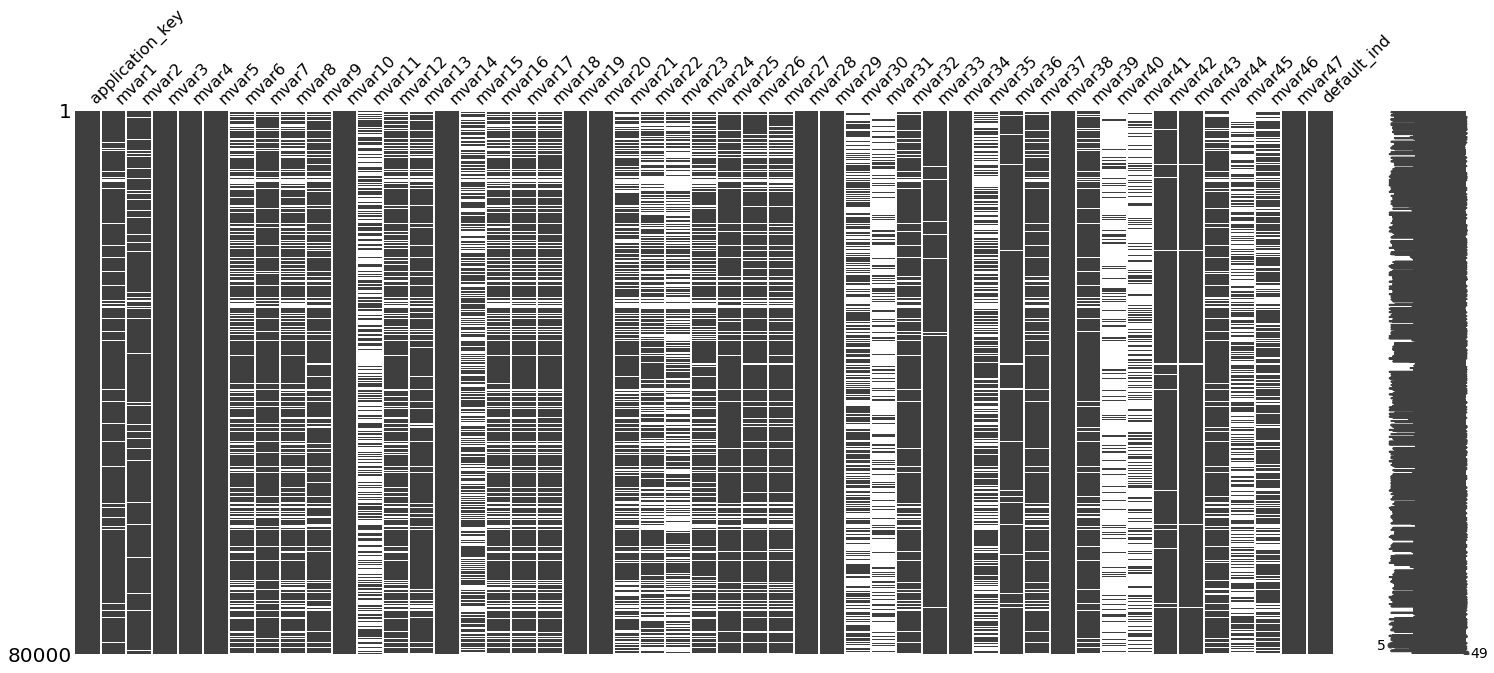

In [239]:
# REALIZING THE MISSING VALUES
plt.figure(figsize=(30, 15))
# sns.heatmap(org_train.isnull(), cbar=False)
msno.matrix(org_train)

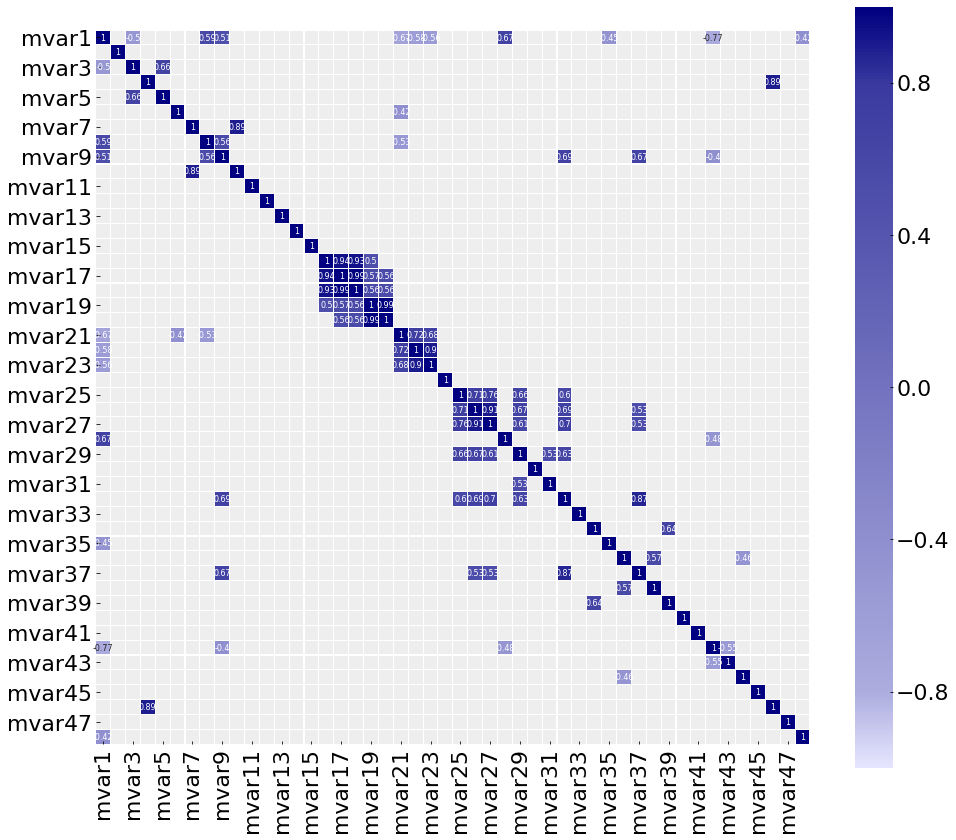

In [248]:
import matplotlib
def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb =matplotlib.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

hc = ['#e5e5ff', '#acacdf', '#7272bf', '#39399f', '#000080']
th = [0, 0.1, 0.5, 0.9, 1]

cdict = NonLinCdict(th, hc)
cm = matplotlib.colors.LinearSegmentedColormap('test', cdict)

corr = org_train.corr() 
plt.figure(figsize=(16, 14))
cx = sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap=cm, 
            vmax=1.0, 
            vmin=-1.0, 
            linewidths=0.1,
            annot=True, 
            annot_kws={"size": 8}, 
            square=True)
fig = cx.get_figure()

# Conclusions
# 16, 17, 18 are closely related - Lets delete 16 and 17
# 19, 20 are closely related - Let's delete 20 
# 32, 37 - Let's delete any
# 46, 4 - Let's delete 46
# 7, 10 - Let's delete 7 

In [241]:
labels = pd.Series(org_train[LABEL].values)

key = org_test[KEY]
org_train.drop([KEY], axis = 1, inplace = True)
org_test.drop([KEY], axis = 1, inplace = True)

org_train.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,...,1.0,73.780,82.547,0.08696,10.0,0.63899,NaN,0.0,0,0
1,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,...,0.0,99.129,NaN,0.00000,13.0,0.63836,NaN,NaN,1,1
2,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,2536.0,...,0.0,NaN,29.290,0.00000,1.0,1.00000,NaN,0.0,0,1
3,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,...,0.0,96.272,NaN,0.15385,3.0,0.53241,0.0,0.0,1,0
4,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,...,0.0,115.019,NaN,0.00000,1.0,0.92665,NaN,NaN,1,0


In [188]:
"""Impute missing values with k nearest classifier."""
import sys
import numpy as np
import pandas as pd
from sklearn import neighbors


class Imputer:
    """Imputer class."""

    def _fit(self, X, column, k=10, is_categorical=False):
        """Fit a knn classifier for missing column.

        - Args:
                X(numpy.ndarray): input data
                column(int): column id to be imputed
                k(int): number of nearest neighbors, default 10
                is_categorical(boolean): is continuous or categorical feature
        - Returns:
                clf: trained k nearest neighbour classifier
        """
        clf = None
        if not is_categorical:
            clf = neighbors.KNeighborsRegressor(n_neighbors=k)
        else:
            clf = neighbors.KNeighborsClassifier(n_neighbors=k)
        # use column not null to train the kNN classifier
        missing_idxes = np.where(pd.isnull(X[:, column]))[0]
        if len(missing_idxes) == 0:
            return None
        X_copy = np.delete(X, missing_idxes, 0)
        X_train = np.delete(X_copy, column, 1)
        # if other columns still have missing values fill with mean
        col_mean = None
        if not is_categorical:
            col_mean = np.nanmean(X, 0)
        else:
            col_mean = np.nanmedian(X, 0)
        for col_id in range(0, len(col_mean) - 1):
            col_missing_idxes = np.where(np.isnan(X_train[:, col_id]))[0]
            if len(col_missing_idxes) == 0:
                continue
            else:
                X_train[col_missing_idxes, col_id] = col_mean[col_id]
        y_train = X_copy[:, column]
        # fit classifier
        clf.fit(X_train, y_train)
        return clf

    def _transform(self, X, column, clf, is_categorical):
        """Impute missing values.

        - Args:
                X(numpy.ndarray): input numpy ndarray
                column(int): index of column to be imputed
                clf: pretrained classifier
                is_categorical(boolean): is continuous or categorical feature
        - Returns:
                X(pandas.dataframe): imputed dataframe
        """
        missing_idxes = np.where(np.isnan(X[:, column]))[0]
        X_test = X[missing_idxes, :]
        X_test = np.delete(X_test, column, 1)
        # if other columns still have missing values fill with mean
        col_mean = None
        if not is_categorical:
            col_mean = np.nanmean(X, 0)
        else:
            col_mean = np.nanmedian(X, 0)
        # fill missing values in each column with current col_mean
        for col_id in range(0, len(col_mean) - 1):
            col_missing_idxes = np.where(np.isnan(X_test[:, col_id]))[0]
            # if no missing values for current column
            if len(col_missing_idxes) == 0:
                continue
            else:
                X_test[col_missing_idxes, col_id] = col_mean[col_id]
        # predict missing values
        y_test = clf.predict(X_test)
        X[missing_idxes, column] = y_test
        return X

    def knn(self, X, column, k=10, is_categorical=False):
        """Impute missing value with knn.

        - Args:
                X(pandas.dataframe): dataframe
                column(str): column name to be imputed
                k(int): number of nearest neighbors, default 10
                is_categorical(boolean): is continuous or categorical feature
        - Returns:
                X_imputed(pandas.dataframe): imputed pandas dataframe
        """
        X, column = self._check_X_y(X, column)
        clf = self._fit(X, column, k, is_categorical)
        if clf is None:
            return X
        else:
            X_imputed = self._transform(X, column, clf, is_categorical)
            return X_imputed

    def _check_X_y(self, X, column):
        """Check input, if pandas.dataframe, transform to numpy array.

        - Args:
                X(ndarray/pandas.dataframe): input instances
                column(str/int): column index or column name
        - Returns:
                X(ndarray): input instances
        """
        column_idx = None
        if isinstance(X, pd.core.frame.DataFrame):
            if isinstance(column, str):
                # get index of current column
                column_idx = X.columns.get_loc(column)
            else:
                column_idx = column
            X = X.as_matrix()
        else:
            column_idx = column
        return X, column_idx

In [213]:
train_len = len(org_train)
label = org_train[LABEL]
temp_org_train = org_train.drop([LABEL], axis = 1)
temp_data = pd.concat([temp_org_train, org_test], axis = 0)
saveit = temp_data['mvar47']
data = temp_data.drop(['mvar47'], axis = 1)

save_series = dict()

missing_col = ['mvar6', 'mvar8'] #, 'mvar27', 'mvar12', 'mvar16', 'mvar17', 'mvar18'
impute = Imputer()
for var in missing_col:
    data_as_array = impute.knn(X=data, column=var) # default 10nn
    kuch_bhi = pd.DataFrame(data_as_array, columns = data.columns)
    save_series[var] = kuch_bhi[var]
data = temp_data.drop(missing_col, axis = 1)

data = data.assign(mvar6=save_series['mvar6'].values)
data = data.assign(mvar8=save_series['mvar8'].values)

data.info()

c:\users\ankit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:118: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\ankit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:118: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 47 columns):
mvar1     100211 non-null float64
mvar2     97741 non-null float64
mvar3     104341 non-null float64
mvar4     104341 non-null float64
mvar5     104341 non-null float64
mvar7     95300 non-null float64
mvar9     90115 non-null float64
mvar10    104340 non-null float64
mvar11    46155 non-null float64
mvar12    86612 non-null float64
mvar13    94083 non-null float64
mvar14    105000 non-null float64
mvar15    62882 non-null float64
mvar16    80814 non-null float64
mvar17    84264 non-null float64
mvar18    85647 non-null float64
mvar19    104995 non-null float64
mvar20    104340 non-null float64
mvar21    75545 non-null float64
mvar22    66795 non-null float64
mvar23    52111 non-null float64
mvar24    80321 non-null float64
mvar27    87798 non-null float64
mvar28    104340 non-null float64
mvar29    104340 non-null float64
mvar30    57134 non-null float64
mvar31    31145 non-n

In [206]:
tryout = data.copy()
tryout = tryout.assign(mvar47=saveit.values)

org_train = tryout[:train_len]
org_train = org_train.assign(default_ind=label.values)
org_test = tryout[train_len:]
org_test.columns

Index(['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8',
       'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15',
       'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20', 'mvar21', 'mvar22',
       'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27', 'mvar28', 'mvar29',
       'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34', 'mvar35', 'mvar36',
       'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41', 'mvar42', 'mvar43',
       'mvar44', 'mvar45', 'mvar46', 'mvar47'],
      dtype='object')

In [207]:
X = org_train.ix[:, org_train.columns != LABEL]
y = org_train.ix[:, org_train.columns == LABEL]
testset = org_test.ix[:]
org_train.head()

c:\users\ankit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
c:\users\ankit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
c:\users\ankit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,...,1.0,73.780,82.547,0.08696,10.0,0.63899,NaN,0.0,0,0
1,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,...,0.0,99.129,NaN,0.00000,13.0,0.63836,NaN,NaN,1,1
2,1745.0,0.4001,0.000,0.0,0.0,1764.2,2536.0,1602.2,NaN,2536.0,...,0.0,NaN,29.290,0.00000,1.0,1.00000,NaN,0.0,0,1
3,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,...,0.0,96.272,NaN,0.15385,3.0,0.53241,0.0,0.0,1,0
4,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,...,0.0,115.019,NaN,0.00000,1.0,0.92665,NaN,NaN,1,0


In [208]:
print ("Original Dataset")
print (len(org_train))
print ("Percentage of normal transactions: ", float(len(org_train[org_train[LABEL]==0]))/float(len(org_train)))
print ("Percentage of default transactions: ", float(len(org_train[org_train[LABEL]==1]))/float(len(org_train)))
print ("Total number of transactions in resampled data: ", len(org_train))

# Number of data points in the minority class
number_records_fraud = len(org_train[org_train[LABEL] == 1])
fraud_indices = np.array(org_train[org_train[LABEL] == 1].index)
normal_indices = org_train[org_train[LABEL] == 0].index

random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
under_sample_data = org_train.iloc[under_sample_indices,:]
X_undersample = under_sample_data.ix[:, under_sample_data.columns != LABEL]
y_undersample = under_sample_data.ix[:, under_sample_data.columns == LABEL]

print ("--------------------------------------------------------------------------------")
print ("Undersample")
print (len(under_sample_data))
print ("Percentage of normal transactions: ", float(len(under_sample_data[under_sample_data[LABEL]==1]))/float(len(under_sample_data)))
print ("Percentage of default transactions: ", float(len(under_sample_data[under_sample_data[LABEL]==0]))/float(len(under_sample_data)))
print ("Total number of transactions in resampled data: ", len(under_sample_data))

Original Dataset
80000
Percentage of normal transactions:  0.7537875
Percentage of default transactions:  0.2462125
Total number of transactions in resampled data:  80000
--------------------------------------------------------------------------------
Undersample
39394
Percentage of normal transactions:  0.5
Percentage of default transactions:  0.5
Total number of transactions in resampled data:  39394


c:\users\ankit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
c:\users\ankit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [209]:
import lightgbm as gbm
cv_params = {
    'learning_rate': 0.01,
    'max_depth': 20,
    'min_child_weight': 5, 
    'min_child_samples': 3, 
    'objective': 'binary', #837206
    'metric':'binary_logloss',
    'min_split_gain': 0.5, 
    'scale_pos_weight': 1,
    'num_leaves': 8, 
    'feature_fraction': 0.4,
    'bagging_fraction': 0.4,
    'max_bin': 50, 
    'subsample': 0.6, 
    'colsample_bytree': 0.7, 
    'reg_alpha': 0.9, 
    'reg_lambda': 0.1
    }
gbm_tr = gbm.Dataset(X_undersample, label=y_undersample.values.ravel())
# gbm_tr = gbm.Dataset(X_smote, label=y_smote)
# LightGBM, cross-validation
cvresult = gbm.cv(cv_params, 
                       gbm_tr, 
                       num_boost_round=5000, 
                       nfold=5, 
                       shuffle = True,
                       stratified=True, 
                       early_stopping_rounds=50, 
                       verbose_eval=1)
# print('best n_estimators:', len(cvresult['auc-mean']))
# print('best cv score:', cvresult['auc-mean'][-1])

[1]	cv_agg's binary_logloss: 0.690699 + 2.84511e-05
[2]	cv_agg's binary_logloss: 0.688552 + 6.02574e-05
[3]	cv_agg's binary_logloss: 0.686468 + 8.17726e-05
[4]	cv_agg's binary_logloss: 0.684049 + 0.000102726
[5]	cv_agg's binary_logloss: 0.681669 + 0.000126143
[6]	cv_agg's binary_logloss: 0.679606 + 0.000146099
[7]	cv_agg's binary_logloss: 0.677616 + 0.000163133
[8]	cv_agg's binary_logloss: 0.675452 + 0.000189362
[9]	cv_agg's binary_logloss: 0.673427 + 0.000199968
[10]	cv_agg's binary_logloss: 0.6713 + 0.000228529
[11]	cv_agg's binary_logloss: 0.66924 + 0.000249529
[12]	cv_agg's binary_logloss: 0.667174 + 0.000273624
[13]	cv_agg's binary_logloss: 0.665169 + 0.000305398
[14]	cv_agg's binary_logloss: 0.663384 + 0.000330125
[15]	cv_agg's binary_logloss: 0.661515 + 0.000335188
[16]	cv_agg's binary_logloss: 0.659707 + 0.00034563
[17]	cv_agg's binary_logloss: 0.65796 + 0.000360186
[18]	cv_agg's binary_logloss: 0.656227 + 0.000382091
[19]	cv_agg's binary_logloss: 0.654613 + 0.000402117
[20]	cv

[166]	cv_agg's binary_logloss: 0.538828 + 0.00245788
[167]	cv_agg's binary_logloss: 0.538533 + 0.0024795
[168]	cv_agg's binary_logloss: 0.538186 + 0.00249141
[169]	cv_agg's binary_logloss: 0.537908 + 0.00250006
[170]	cv_agg's binary_logloss: 0.537551 + 0.00250685
[171]	cv_agg's binary_logloss: 0.537195 + 0.00251861
[172]	cv_agg's binary_logloss: 0.536861 + 0.00253736
[173]	cv_agg's binary_logloss: 0.53654 + 0.00255182
[174]	cv_agg's binary_logloss: 0.536267 + 0.00256444
[175]	cv_agg's binary_logloss: 0.535961 + 0.00258056
[176]	cv_agg's binary_logloss: 0.535676 + 0.00258572
[177]	cv_agg's binary_logloss: 0.535323 + 0.00260363
[178]	cv_agg's binary_logloss: 0.535 + 0.00261327
[179]	cv_agg's binary_logloss: 0.534714 + 0.00261806
[180]	cv_agg's binary_logloss: 0.534441 + 0.00262478
[181]	cv_agg's binary_logloss: 0.534163 + 0.0026312
[182]	cv_agg's binary_logloss: 0.533899 + 0.00264268
[183]	cv_agg's binary_logloss: 0.533579 + 0.00265828
[184]	cv_agg's binary_logloss: 0.533232 + 0.00267512

[336]	cv_agg's binary_logloss: 0.508891 + 0.00386037
[337]	cv_agg's binary_logloss: 0.508801 + 0.0038684
[338]	cv_agg's binary_logloss: 0.508714 + 0.00387616
[339]	cv_agg's binary_logloss: 0.508619 + 0.00388199
[340]	cv_agg's binary_logloss: 0.508552 + 0.00389075
[341]	cv_agg's binary_logloss: 0.508464 + 0.00389423
[342]	cv_agg's binary_logloss: 0.508374 + 0.00390468
[343]	cv_agg's binary_logloss: 0.50829 + 0.00391419
[344]	cv_agg's binary_logloss: 0.508212 + 0.00392311
[345]	cv_agg's binary_logloss: 0.50814 + 0.00393314
[346]	cv_agg's binary_logloss: 0.508062 + 0.0039353
[347]	cv_agg's binary_logloss: 0.507974 + 0.00393609
[348]	cv_agg's binary_logloss: 0.507897 + 0.00393768
[349]	cv_agg's binary_logloss: 0.507839 + 0.00394908
[350]	cv_agg's binary_logloss: 0.507754 + 0.00396143
[351]	cv_agg's binary_logloss: 0.507672 + 0.00396655
[352]	cv_agg's binary_logloss: 0.507596 + 0.00397114
[353]	cv_agg's binary_logloss: 0.507516 + 0.00397403
[354]	cv_agg's binary_logloss: 0.507443 + 0.003977

[657]	cv_agg's binary_logloss: 0.497122 + 0.00463732
[658]	cv_agg's binary_logloss: 0.497107 + 0.00463776
[659]	cv_agg's binary_logloss: 0.497091 + 0.00463711
[660]	cv_agg's binary_logloss: 0.497074 + 0.00463965
[661]	cv_agg's binary_logloss: 0.497054 + 0.00463858
[662]	cv_agg's binary_logloss: 0.497042 + 0.00464023
[663]	cv_agg's binary_logloss: 0.497034 + 0.0046395
[664]	cv_agg's binary_logloss: 0.497022 + 0.00464076
[665]	cv_agg's binary_logloss: 0.497008 + 0.00463964
[666]	cv_agg's binary_logloss: 0.496997 + 0.00464246
[667]	cv_agg's binary_logloss: 0.496988 + 0.00464114
[668]	cv_agg's binary_logloss: 0.496978 + 0.00464129
[669]	cv_agg's binary_logloss: 0.496966 + 0.00464061
[670]	cv_agg's binary_logloss: 0.49695 + 0.00463589
[671]	cv_agg's binary_logloss: 0.496939 + 0.00463594
[672]	cv_agg's binary_logloss: 0.496921 + 0.00463811
[673]	cv_agg's binary_logloss: 0.496907 + 0.00463732
[674]	cv_agg's binary_logloss: 0.496892 + 0.00463926
[675]	cv_agg's binary_logloss: 0.496881 + 0.0046

[828]	cv_agg's binary_logloss: 0.495182 + 0.00459198
[829]	cv_agg's binary_logloss: 0.495174 + 0.00459221
[830]	cv_agg's binary_logloss: 0.495168 + 0.00459456
[831]	cv_agg's binary_logloss: 0.495159 + 0.00459749
[832]	cv_agg's binary_logloss: 0.495151 + 0.0046002
[833]	cv_agg's binary_logloss: 0.495142 + 0.00459634
[834]	cv_agg's binary_logloss: 0.495127 + 0.00459035
[835]	cv_agg's binary_logloss: 0.495118 + 0.00458733
[836]	cv_agg's binary_logloss: 0.495111 + 0.00458645
[837]	cv_agg's binary_logloss: 0.495107 + 0.00458832
[838]	cv_agg's binary_logloss: 0.495098 + 0.00458723
[839]	cv_agg's binary_logloss: 0.495089 + 0.00458432
[840]	cv_agg's binary_logloss: 0.495081 + 0.00459017
[841]	cv_agg's binary_logloss: 0.495074 + 0.00459237
[842]	cv_agg's binary_logloss: 0.495065 + 0.00459421
[843]	cv_agg's binary_logloss: 0.495053 + 0.00458511
[844]	cv_agg's binary_logloss: 0.495044 + 0.00458273
[845]	cv_agg's binary_logloss: 0.495039 + 0.00458236
[846]	cv_agg's binary_logloss: 0.495031 + 0.004

[1002]	cv_agg's binary_logloss: 0.49395 + 0.00447574
[1003]	cv_agg's binary_logloss: 0.493946 + 0.0044726
[1004]	cv_agg's binary_logloss: 0.493945 + 0.00447062
[1005]	cv_agg's binary_logloss: 0.49394 + 0.00446731
[1006]	cv_agg's binary_logloss: 0.493934 + 0.00446512
[1007]	cv_agg's binary_logloss: 0.493926 + 0.00446436
[1008]	cv_agg's binary_logloss: 0.49392 + 0.0044626
[1009]	cv_agg's binary_logloss: 0.493918 + 0.00446395
[1010]	cv_agg's binary_logloss: 0.493915 + 0.00446427
[1011]	cv_agg's binary_logloss: 0.493909 + 0.00446554
[1012]	cv_agg's binary_logloss: 0.493903 + 0.00446038
[1013]	cv_agg's binary_logloss: 0.493898 + 0.00445801
[1014]	cv_agg's binary_logloss: 0.493894 + 0.00446135
[1015]	cv_agg's binary_logloss: 0.493881 + 0.00446042
[1016]	cv_agg's binary_logloss: 0.493876 + 0.00445957
[1017]	cv_agg's binary_logloss: 0.493866 + 0.0044607
[1018]	cv_agg's binary_logloss: 0.493859 + 0.00445565
[1019]	cv_agg's binary_logloss: 0.493852 + 0.00445633
[1020]	cv_agg's binary_logloss: 0.

[1164]	cv_agg's binary_logloss: 0.493199 + 0.00433387
[1165]	cv_agg's binary_logloss: 0.493193 + 0.00433772
[1166]	cv_agg's binary_logloss: 0.493186 + 0.0043377
[1167]	cv_agg's binary_logloss: 0.493186 + 0.00433494
[1168]	cv_agg's binary_logloss: 0.493182 + 0.00433231
[1169]	cv_agg's binary_logloss: 0.493177 + 0.00433159
[1170]	cv_agg's binary_logloss: 0.493173 + 0.0043289
[1171]	cv_agg's binary_logloss: 0.493172 + 0.0043297
[1172]	cv_agg's binary_logloss: 0.493165 + 0.00432411
[1173]	cv_agg's binary_logloss: 0.49316 + 0.00432226
[1174]	cv_agg's binary_logloss: 0.493152 + 0.00431754
[1175]	cv_agg's binary_logloss: 0.493151 + 0.00431812
[1176]	cv_agg's binary_logloss: 0.493145 + 0.0043184
[1177]	cv_agg's binary_logloss: 0.493139 + 0.00431956
[1178]	cv_agg's binary_logloss: 0.493136 + 0.00431879
[1179]	cv_agg's binary_logloss: 0.493131 + 0.0043174
[1180]	cv_agg's binary_logloss: 0.493121 + 0.00431872
[1181]	cv_agg's binary_logloss: 0.493116 + 0.0043167
[1182]	cv_agg's binary_logloss: 0.4

[1325]	cv_agg's binary_logloss: 0.492628 + 0.00425356
[1326]	cv_agg's binary_logloss: 0.492628 + 0.00425152
[1327]	cv_agg's binary_logloss: 0.492625 + 0.00425217
[1328]	cv_agg's binary_logloss: 0.492625 + 0.00425313
[1329]	cv_agg's binary_logloss: 0.492622 + 0.00424891
[1330]	cv_agg's binary_logloss: 0.49262 + 0.00424697
[1331]	cv_agg's binary_logloss: 0.492622 + 0.00424949
[1332]	cv_agg's binary_logloss: 0.492616 + 0.00425048
[1333]	cv_agg's binary_logloss: 0.492611 + 0.00425324
[1334]	cv_agg's binary_logloss: 0.492612 + 0.00425439
[1335]	cv_agg's binary_logloss: 0.49261 + 0.00425865
[1336]	cv_agg's binary_logloss: 0.49261 + 0.00426216
[1337]	cv_agg's binary_logloss: 0.492609 + 0.00426165
[1338]	cv_agg's binary_logloss: 0.492607 + 0.00426288
[1339]	cv_agg's binary_logloss: 0.492606 + 0.0042602
[1340]	cv_agg's binary_logloss: 0.492604 + 0.00425745
[1341]	cv_agg's binary_logloss: 0.492597 + 0.00425428
[1342]	cv_agg's binary_logloss: 0.492593 + 0.00425827
[1343]	cv_agg's binary_logloss: 

[1490]	cv_agg's binary_logloss: 0.49224 + 0.00422528
[1491]	cv_agg's binary_logloss: 0.492236 + 0.00422534
[1492]	cv_agg's binary_logloss: 0.492235 + 0.00422781
[1493]	cv_agg's binary_logloss: 0.492232 + 0.00422701
[1494]	cv_agg's binary_logloss: 0.492231 + 0.00422374
[1495]	cv_agg's binary_logloss: 0.492228 + 0.00422246
[1496]	cv_agg's binary_logloss: 0.492225 + 0.00422286
[1497]	cv_agg's binary_logloss: 0.492222 + 0.00422009
[1498]	cv_agg's binary_logloss: 0.492221 + 0.00421794
[1499]	cv_agg's binary_logloss: 0.492221 + 0.00421605
[1500]	cv_agg's binary_logloss: 0.492218 + 0.00421547
[1501]	cv_agg's binary_logloss: 0.492217 + 0.00421272
[1502]	cv_agg's binary_logloss: 0.492216 + 0.004213
[1503]	cv_agg's binary_logloss: 0.492215 + 0.00421196
[1504]	cv_agg's binary_logloss: 0.492214 + 0.00421287
[1505]	cv_agg's binary_logloss: 0.492209 + 0.00421318
[1506]	cv_agg's binary_logloss: 0.492212 + 0.00421225
[1507]	cv_agg's binary_logloss: 0.492209 + 0.00421228
[1508]	cv_agg's binary_logloss:

[1654]	cv_agg's binary_logloss: 0.491936 + 0.00419066
[1655]	cv_agg's binary_logloss: 0.491932 + 0.00419046
[1656]	cv_agg's binary_logloss: 0.491931 + 0.00418925
[1657]	cv_agg's binary_logloss: 0.491925 + 0.0041894
[1658]	cv_agg's binary_logloss: 0.491925 + 0.00418846
[1659]	cv_agg's binary_logloss: 0.491926 + 0.00418791
[1660]	cv_agg's binary_logloss: 0.491923 + 0.00418824
[1661]	cv_agg's binary_logloss: 0.491923 + 0.00418416
[1662]	cv_agg's binary_logloss: 0.491923 + 0.00418084
[1663]	cv_agg's binary_logloss: 0.491921 + 0.00418063
[1664]	cv_agg's binary_logloss: 0.491921 + 0.00417937
[1665]	cv_agg's binary_logloss: 0.491918 + 0.00418003
[1666]	cv_agg's binary_logloss: 0.491916 + 0.00418224
[1667]	cv_agg's binary_logloss: 0.491916 + 0.00417984
[1668]	cv_agg's binary_logloss: 0.491914 + 0.00417665
[1669]	cv_agg's binary_logloss: 0.491913 + 0.00417761
[1670]	cv_agg's binary_logloss: 0.49191 + 0.00417889
[1671]	cv_agg's binary_logloss: 0.491909 + 0.00418006
[1672]	cv_agg's binary_logloss

[1818]	cv_agg's binary_logloss: 0.491688 + 0.00414272
[1819]	cv_agg's binary_logloss: 0.491685 + 0.00414366
[1820]	cv_agg's binary_logloss: 0.491682 + 0.00413792
[1821]	cv_agg's binary_logloss: 0.49168 + 0.00413864
[1822]	cv_agg's binary_logloss: 0.491677 + 0.00413879
[1823]	cv_agg's binary_logloss: 0.49168 + 0.00413851
[1824]	cv_agg's binary_logloss: 0.49168 + 0.00413692
[1825]	cv_agg's binary_logloss: 0.491682 + 0.00413708
[1826]	cv_agg's binary_logloss: 0.491681 + 0.00413884
[1827]	cv_agg's binary_logloss: 0.491682 + 0.00414099
[1828]	cv_agg's binary_logloss: 0.491682 + 0.00413997
[1829]	cv_agg's binary_logloss: 0.491682 + 0.004138
[1830]	cv_agg's binary_logloss: 0.491677 + 0.00413577
[1831]	cv_agg's binary_logloss: 0.491671 + 0.00413731
[1832]	cv_agg's binary_logloss: 0.491669 + 0.00413972
[1833]	cv_agg's binary_logloss: 0.491665 + 0.00413868
[1834]	cv_agg's binary_logloss: 0.491661 + 0.00414118
[1835]	cv_agg's binary_logloss: 0.491658 + 0.00414305
[1836]	cv_agg's binary_logloss: 0

[1981]	cv_agg's binary_logloss: 0.491449 + 0.00411706
[1982]	cv_agg's binary_logloss: 0.49145 + 0.00411602
[1983]	cv_agg's binary_logloss: 0.491451 + 0.00411838
[1984]	cv_agg's binary_logloss: 0.491446 + 0.00411984
[1985]	cv_agg's binary_logloss: 0.491444 + 0.00412112
[1986]	cv_agg's binary_logloss: 0.491446 + 0.00412194
[1987]	cv_agg's binary_logloss: 0.491448 + 0.00412578
[1988]	cv_agg's binary_logloss: 0.491439 + 0.00412425
[1989]	cv_agg's binary_logloss: 0.491435 + 0.00412255
[1990]	cv_agg's binary_logloss: 0.491432 + 0.00412214
[1991]	cv_agg's binary_logloss: 0.491427 + 0.00412246
[1992]	cv_agg's binary_logloss: 0.491429 + 0.00412118
[1993]	cv_agg's binary_logloss: 0.491429 + 0.00412209
[1994]	cv_agg's binary_logloss: 0.491424 + 0.00411914
[1995]	cv_agg's binary_logloss: 0.491423 + 0.0041185
[1996]	cv_agg's binary_logloss: 0.491422 + 0.00412021
[1997]	cv_agg's binary_logloss: 0.491421 + 0.00412141
[1998]	cv_agg's binary_logloss: 0.491425 + 0.00411831
[1999]	cv_agg's binary_logloss

[2142]	cv_agg's binary_logloss: 0.491266 + 0.00411571
[2143]	cv_agg's binary_logloss: 0.491263 + 0.00411621
[2144]	cv_agg's binary_logloss: 0.491261 + 0.00411489
[2145]	cv_agg's binary_logloss: 0.491258 + 0.00411563
[2146]	cv_agg's binary_logloss: 0.491255 + 0.00411622
[2147]	cv_agg's binary_logloss: 0.491252 + 0.0041158
[2148]	cv_agg's binary_logloss: 0.491251 + 0.00411529
[2149]	cv_agg's binary_logloss: 0.491249 + 0.00411393
[2150]	cv_agg's binary_logloss: 0.491252 + 0.00411124
[2151]	cv_agg's binary_logloss: 0.491252 + 0.00411108
[2152]	cv_agg's binary_logloss: 0.491248 + 0.00411128
[2153]	cv_agg's binary_logloss: 0.491246 + 0.00410992
[2154]	cv_agg's binary_logloss: 0.491247 + 0.00411065
[2155]	cv_agg's binary_logloss: 0.491245 + 0.00410994
[2156]	cv_agg's binary_logloss: 0.491242 + 0.00411297
[2157]	cv_agg's binary_logloss: 0.491241 + 0.00411105
[2158]	cv_agg's binary_logloss: 0.491241 + 0.00411004
[2159]	cv_agg's binary_logloss: 0.491244 + 0.0041124
[2160]	cv_agg's binary_logloss

[2302]	cv_agg's binary_logloss: 0.491118 + 0.00407467
[2303]	cv_agg's binary_logloss: 0.491116 + 0.00407341
[2304]	cv_agg's binary_logloss: 0.491114 + 0.00407626
[2305]	cv_agg's binary_logloss: 0.49111 + 0.00407564
[2306]	cv_agg's binary_logloss: 0.491109 + 0.00407352
[2307]	cv_agg's binary_logloss: 0.491111 + 0.00407446
[2308]	cv_agg's binary_logloss: 0.491111 + 0.0040766
[2309]	cv_agg's binary_logloss: 0.491112 + 0.00407663
[2310]	cv_agg's binary_logloss: 0.49111 + 0.00407588
[2311]	cv_agg's binary_logloss: 0.49111 + 0.00407644
[2312]	cv_agg's binary_logloss: 0.49111 + 0.00407463
[2313]	cv_agg's binary_logloss: 0.491112 + 0.00407263
[2314]	cv_agg's binary_logloss: 0.491112 + 0.00407213
[2315]	cv_agg's binary_logloss: 0.491112 + 0.00406967
[2316]	cv_agg's binary_logloss: 0.491108 + 0.00407058
[2317]	cv_agg's binary_logloss: 0.491105 + 0.00406822
[2318]	cv_agg's binary_logloss: 0.491102 + 0.00406781
[2319]	cv_agg's binary_logloss: 0.491102 + 0.0040686
[2320]	cv_agg's binary_logloss: 0.

[2464]	cv_agg's binary_logloss: 0.491001 + 0.00406322
[2465]	cv_agg's binary_logloss: 0.491 + 0.00406125
[2466]	cv_agg's binary_logloss: 0.491001 + 0.00406176
[2467]	cv_agg's binary_logloss: 0.490998 + 0.00405998
[2468]	cv_agg's binary_logloss: 0.490998 + 0.00406264
[2469]	cv_agg's binary_logloss: 0.490996 + 0.00406401
[2470]	cv_agg's binary_logloss: 0.490996 + 0.00406415
[2471]	cv_agg's binary_logloss: 0.490995 + 0.004065
[2472]	cv_agg's binary_logloss: 0.490994 + 0.0040653
[2473]	cv_agg's binary_logloss: 0.49099 + 0.00406492
[2474]	cv_agg's binary_logloss: 0.49099 + 0.0040641
[2475]	cv_agg's binary_logloss: 0.490988 + 0.00406317
[2476]	cv_agg's binary_logloss: 0.490991 + 0.00406278
[2477]	cv_agg's binary_logloss: 0.490993 + 0.00406495
[2478]	cv_agg's binary_logloss: 0.49099 + 0.00406313
[2479]	cv_agg's binary_logloss: 0.490984 + 0.00406196
[2480]	cv_agg's binary_logloss: 0.490984 + 0.00406472
[2481]	cv_agg's binary_logloss: 0.490985 + 0.00406418
[2482]	cv_agg's binary_logloss: 0.4909

[2621]	cv_agg's binary_logloss: 0.490898 + 0.00406116
[2622]	cv_agg's binary_logloss: 0.4909 + 0.00405944
[2623]	cv_agg's binary_logloss: 0.4909 + 0.00405865
[2624]	cv_agg's binary_logloss: 0.490901 + 0.00405636
[2625]	cv_agg's binary_logloss: 0.4909 + 0.00405541
[2626]	cv_agg's binary_logloss: 0.490897 + 0.00405326
[2627]	cv_agg's binary_logloss: 0.490898 + 0.00405344
[2628]	cv_agg's binary_logloss: 0.490894 + 0.00404947
[2629]	cv_agg's binary_logloss: 0.49089 + 0.00405138
[2630]	cv_agg's binary_logloss: 0.490891 + 0.00404903
[2631]	cv_agg's binary_logloss: 0.490891 + 0.0040472
[2632]	cv_agg's binary_logloss: 0.490892 + 0.00404571
[2633]	cv_agg's binary_logloss: 0.490893 + 0.00404742
[2634]	cv_agg's binary_logloss: 0.490893 + 0.00404692
[2635]	cv_agg's binary_logloss: 0.490892 + 0.00404261
[2636]	cv_agg's binary_logloss: 0.490891 + 0.00404337
[2637]	cv_agg's binary_logloss: 0.490892 + 0.00404127
[2638]	cv_agg's binary_logloss: 0.49089 + 0.00404411
[2639]	cv_agg's binary_logloss: 0.490

[2784]	cv_agg's binary_logloss: 0.49083 + 0.00400393
[2785]	cv_agg's binary_logloss: 0.490828 + 0.00400563
[2786]	cv_agg's binary_logloss: 0.490828 + 0.00400533
[2787]	cv_agg's binary_logloss: 0.490826 + 0.004008
[2788]	cv_agg's binary_logloss: 0.490828 + 0.00400691
[2789]	cv_agg's binary_logloss: 0.490826 + 0.00400741
[2790]	cv_agg's binary_logloss: 0.490827 + 0.00400809
[2791]	cv_agg's binary_logloss: 0.490824 + 0.00400726
[2792]	cv_agg's binary_logloss: 0.490823 + 0.00400707
[2793]	cv_agg's binary_logloss: 0.49082 + 0.00400499
[2794]	cv_agg's binary_logloss: 0.490817 + 0.0040043
[2795]	cv_agg's binary_logloss: 0.490814 + 0.00400678
[2796]	cv_agg's binary_logloss: 0.490816 + 0.00400382
[2797]	cv_agg's binary_logloss: 0.490815 + 0.00400294
[2798]	cv_agg's binary_logloss: 0.490817 + 0.00400543
[2799]	cv_agg's binary_logloss: 0.490816 + 0.00400367
[2800]	cv_agg's binary_logloss: 0.490813 + 0.0040038
[2801]	cv_agg's binary_logloss: 0.490812 + 0.00400268
[2802]	cv_agg's binary_logloss: 0.

[2940]	cv_agg's binary_logloss: 0.490744 + 0.00397616
[2941]	cv_agg's binary_logloss: 0.49074 + 0.00397761
[2942]	cv_agg's binary_logloss: 0.490743 + 0.00398017
[2943]	cv_agg's binary_logloss: 0.490741 + 0.00397769
[2944]	cv_agg's binary_logloss: 0.490741 + 0.00397835
[2945]	cv_agg's binary_logloss: 0.490739 + 0.00397967
[2946]	cv_agg's binary_logloss: 0.490736 + 0.00398187
[2947]	cv_agg's binary_logloss: 0.490736 + 0.00398129
[2948]	cv_agg's binary_logloss: 0.490736 + 0.00398093
[2949]	cv_agg's binary_logloss: 0.490738 + 0.00397865
[2950]	cv_agg's binary_logloss: 0.490739 + 0.00398316
[2951]	cv_agg's binary_logloss: 0.490736 + 0.00398374
[2952]	cv_agg's binary_logloss: 0.490734 + 0.00398586
[2953]	cv_agg's binary_logloss: 0.490736 + 0.0039864
[2954]	cv_agg's binary_logloss: 0.490733 + 0.00398337
[2955]	cv_agg's binary_logloss: 0.490736 + 0.00398563
[2956]	cv_agg's binary_logloss: 0.490736 + 0.00398479
[2957]	cv_agg's binary_logloss: 0.490737 + 0.00398289
[2958]	cv_agg's binary_logloss

[3097]	cv_agg's binary_logloss: 0.490689 + 0.00396387
[3098]	cv_agg's binary_logloss: 0.490688 + 0.0039636
[3099]	cv_agg's binary_logloss: 0.490687 + 0.00396075
[3100]	cv_agg's binary_logloss: 0.490688 + 0.00395975
[3101]	cv_agg's binary_logloss: 0.490687 + 0.00396023
[3102]	cv_agg's binary_logloss: 0.490688 + 0.00395806
[3103]	cv_agg's binary_logloss: 0.490688 + 0.00395796
[3104]	cv_agg's binary_logloss: 0.490686 + 0.0039601
[3105]	cv_agg's binary_logloss: 0.490688 + 0.00395836
[3106]	cv_agg's binary_logloss: 0.490689 + 0.00395796
[3107]	cv_agg's binary_logloss: 0.490689 + 0.00395702
[3108]	cv_agg's binary_logloss: 0.490687 + 0.00395795
[3109]	cv_agg's binary_logloss: 0.490692 + 0.0039577
[3110]	cv_agg's binary_logloss: 0.490691 + 0.00395885
[3111]	cv_agg's binary_logloss: 0.490689 + 0.00396132
[3112]	cv_agg's binary_logloss: 0.490689 + 0.00396294
[3113]	cv_agg's binary_logloss: 0.490692 + 0.00396364
[3114]	cv_agg's binary_logloss: 0.490688 + 0.00396347
[3115]	cv_agg's binary_logloss:

In [115]:
cv_params = {
    'learning_rate': 0.01,
    'max_depth': 20,
    'min_child_weight': 5, 
    'min_child_samples': 3, 
    'objective': 'binary',
    'metric':'binary_logloss',
    'min_split_gain': 0.5, 
    'scale_pos_weight': 1,
    'num_leaves': 8, 
    'feature_fraction': 0.4,
    'bagging_fraction': 0.4,
    'max_bin': 50, 
    'subsample': 0.6, 
    'colsample_bytree': 0.7, 
    'reg_alpha': 0.9, 
    'reg_lambda': 0.1
    }

evals_result = {}  # to record eval results for plotting
gbm_tr = gbm.Dataset(X_undersample, label=y_undersample.values.ravel())
# gbm_tr = gbm.Dataset(X_smote, label=y_smote)
INITIAL_MODEL = gbm.train(cv_params, 
                gbm_tr, 
                num_boost_round=900,
                evals_result=evals_result,
                verbose_eval=1)


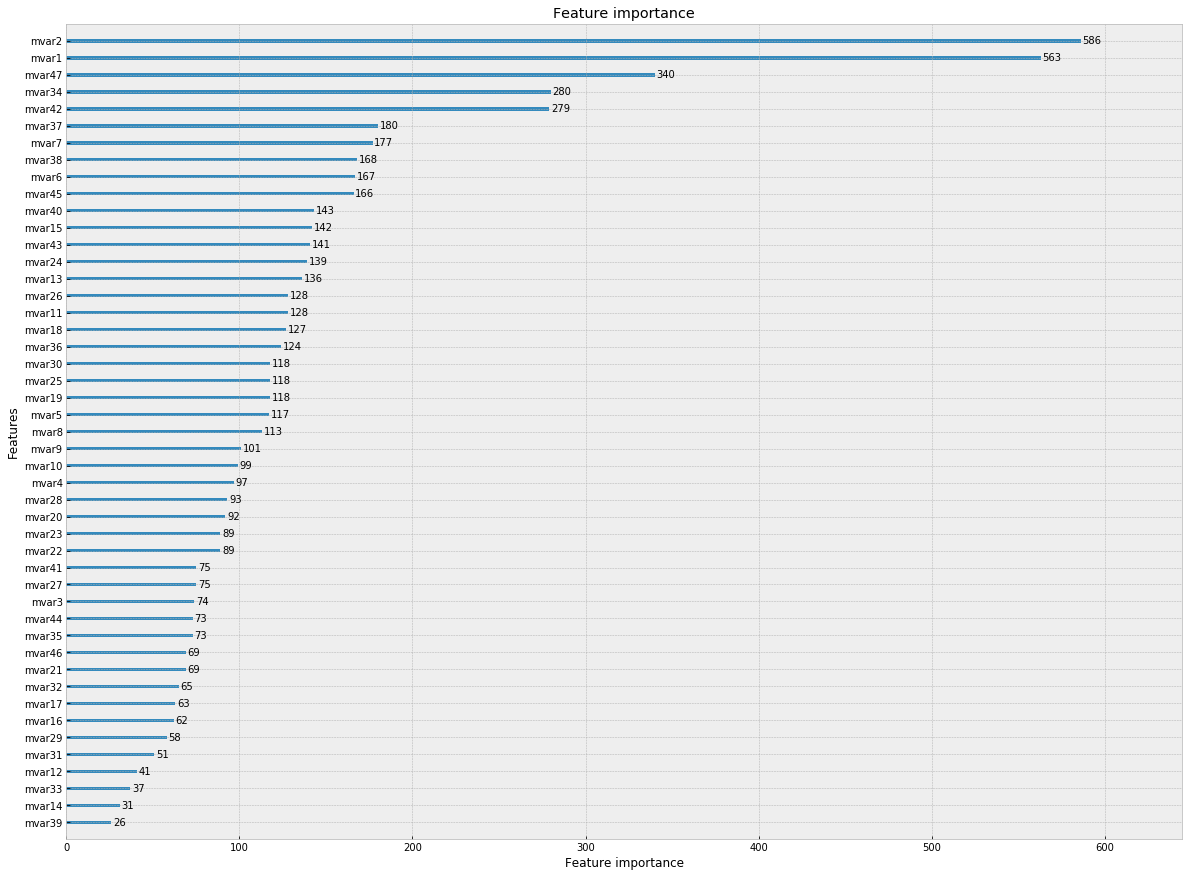

In [134]:
ax = gbm.plot_importance(INITIAL_MODEL, max_num_features=47, figsize=(20,15))
plt.show()

In [117]:
gbm_ts = gbm.Dataset(testset)
y_pred=INITIAL_MODEL.predict(testset)

threshold = 0.85

y_binary = [0]*len(y_pred)
for i, val in enumerate(y_pred):
    if val>threshold:
        y_binary[i] = 1
submission = pd.DataFrame(list(zip(key,y_binary,y_pred)))
submission = submission.sort_values(submission.columns[-1])
submission = submission.drop([submission.columns[-1]], axis=1)
submission.to_csv("TheWing_IITKGP.csv",  index=False)